<a href="https://colab.research.google.com/github/ruchi243/Sales_Analysis_and_Forecasting/blob/main/Multiple_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [121]:
url = 'https://raw.githubusercontent.com/ruchi243/Exploratory_Data_Analysis/main/Sample%20-%20Superstore.csv'

In [122]:
import datetime as dt
dataset = pd.read_csv(url)

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset['Order Year'] = pd.to_datetime(dataset['Order Date']).dt.year
dataset.drop(["Row ID", "Customer ID","Order ID","Postal Code","Product ID","Product Name","Country","Ship Date","Order Date","Customer Name"], axis = 1, inplace = True)


display(dataset.head())

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,11,2016
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,11,2016
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6,2016
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,10,2015
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,10,2015


In [123]:
encoder = LabelEncoder()

In [124]:
dataset['City']=encoder.fit_transform(dataset['City'])
dataset['Segment']=encoder.fit_transform(dataset['Segment'])
dataset['Ship Mode']=encoder.fit_transform(dataset['Ship Mode'])
dataset['State']=encoder.fit_transform(dataset['State'])
dataset['Region']=encoder.fit_transform(dataset['Region'])
dataset['Category']=encoder.fit_transform(dataset['Category'])
dataset['Sub-Category']=encoder.fit_transform(dataset['Sub-Category'])


In [125]:
X = dataset.drop("Sales",axis = 1)


Y = dataset['Sales']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6995, 12) (6995,)
(2999, 12) (2999,)


In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [128]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, Y_train)

LinearRegression()

In [129]:
y_prediction = reg.predict(X_test)
y_prediction

array([ 284.61475914, -362.37151161,  175.56071994, ...,   83.35032163,
        326.89523311,  300.62691085])

In [130]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(Y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,y_prediction)))

r2 score is  0.21972166336950028
mean_sqrd_error is== 242977.71159240234
root_mean_squared error of is== 492.927694081396


## **Gradient Boost Regression**

In [148]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [154]:
feature_list = {'shipmode','segment','city','state','region','category','subcat','quant','disc','pf','ordmon','ordyr'}

In [149]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)

In [150]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [151]:
gbr.fit(X_train_std, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [152]:
print("Model Accuracy: %.3f" % gbr.score(X_test_std, Y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(Y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.602
The mean squared error (MSE) on test set: 123840.1722


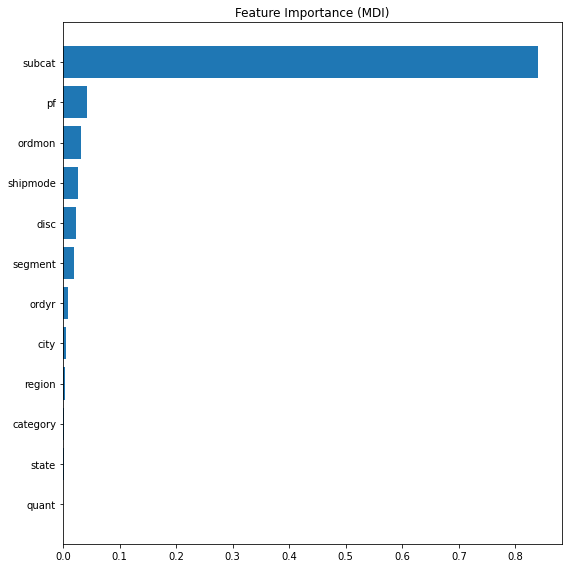

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_list)
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

## **Suppor Vector Regression**

In [166]:
from sklearn.svm import SVR
# create the model object
regressor2 = SVR(kernel = 'rbf')
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
# fit the model on the data
regressor2.fit(X_train_std, Y_train)

SVR()

In [167]:
y_pred =regressor2.predict(X_test_std)

In [168]:
y_pred

array([12.15574761, 41.23775304, 60.99281961, ..., 48.39315451,
       67.22874027, 70.43466439])

In [169]:
predictions = regressor2.predict(X_test_std)# Calculate the absolute errors
errors = abs(y_pred - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors)))

Mean Absolute Error: 200


In [172]:
mape = 100 * (errors / Y_test)# Calculate and display accuracy
accuracy = abs(100 - np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.82 %.
